Device tree overlay

In [1]:
from redpitaya.overlay.mercury import mercury as FPGA
overlay = FPGA()

Hardware identification

In [2]:
regid = FPGA.hwid()

hex(regid.dna)

'0x11c0dce4b59085c'

In [3]:
del(regid)

Arbitrary signal generator

In [4]:
import numpy as np

gen0 = FPGA.gen(0)

x = np.linspace(-np.pi, np.pi, gen0.N, endpoint=False)
wave = np.sin(x)

gen0.amplitude = 1.0
gen0.offset    = 0
# waveform should be loaded before frequency and phase are calculated
# this provides the correct buffer size
gen0.waveform  = wave
gen0.frequency = 10000
gen0.phase     = 0
gen0.control_mask = gen0.event_mask
gen0.start()
gen0.trigger()
gen0.enable = True

In [5]:
gen0.show_regset()

ctl_sts = 0x0000000a =         10  # control/status                 
cfg_trg = 0x00000000 =          0  # HW trigger mask                
irq_ena = 0x00000000 =          0  # interrupt enable               
irq_sts = 0x00000000 =          0  # interrupt status               
cfg_rst = 0x00000001 =          1  # mask reset                     
cfg_str = 0x00000001 =          1  # mask start                     
cfg_stp = 0x00000001 =          1  # mask stop                      
cfg_swt = 0x00000001 =          1  # mask trigger                   
cfg_siz = 0x3fffffff = 1073741823  # table size                     
cfg_off = 0x00000000 =          0  # table offset                   
cfg_ste = 0x00014f8a =      85898  # table step                     
cfg_bmd = 0x00000000 =          0  # burst mode [1:0] = [inf, ben]  
cfg_bdl = 0x00000000 =          0  # burst data length              
cfg_bln = 0x00000000 =          0  # burst length (data+pause)      
cfg_bnm = 0x00000000 =          0 

Acquire (oscilloscope)

In [6]:
osc0 = FPGA.osc(0, 1.0)

In [7]:
# TODO: for now bypass input filter
osc0.filter_bypass = True

# trigger timing
N = FPGA.osc.N
osc0.regset.cfg_pre = N//4*1
osc0.regset.cfg_pst = N//4*3

# trigger level [V], edge and holdoff [periods]
osc0.level = [-0.1, +0.1]
osc0.edg = 'pos'
osc0.holdoff = 20

# control/trigger event mask
# itself is the source of all events
osc0.control_mask = osc0.event_mask
osc0.trigger_mask = osc0.event_mask

osc0.reset()
osc0.start()
#osc0.trigger()
while (osc0.status_run()): pass
#osc0.stop()

In [8]:
osc0.show_regset()

ctl_sts = 0x0000000c =         12  # control/status            
cfg_trg = 0x00000004 =          4  # HW trigger mask           
irq_ena = 0x00000000 =          0  # interrupt enable          
irq_sts = 0x00000000 =          0  # interrupt status          
cfg_rst = 0x00000004 =          4  # mask reset                
cfg_str = 0x00000004 =          4  # mask start                
cfg_stp = 0x00000004 =          4  # mask stop                 
cfg_swt = 0x00000004 =          4  # mask trigger              
cfg_pre = 0x00001000 =       4096  # delay pre  trigger        
cfg_pst = 0x00003000 =      12288  # delay post trigger        
sts_pre = 0x00003126 =      12582  # status pre  trigger       
sts_pst = 0x00003000 =      12288  # status post trigger       
cfg_neg = 0x-0000ccc =      -3276  # negative level            
cfg_pos = 0x00000ccc =       3276  # positive level            
cfg_edg = 0x00000000 =          0  # edge (0-pos, 1-neg)       
cfg_hld = 0x00000014 =         20  # hol

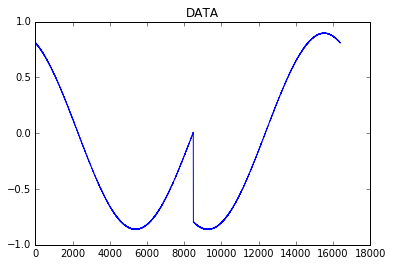

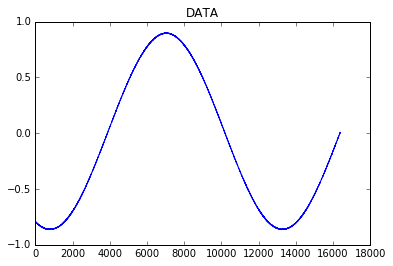

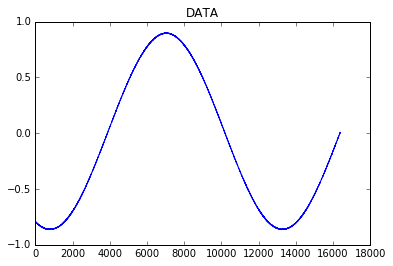

In [9]:
import matplotlib.pyplot as plt

# show entire buffer while ignoring write pointer position
data = osc0.data(ptr=0)
plt.plot(data)
plt.title('DATA');
plt.show()

# show entire buffer properly alligned with write pointer
data = osc0.data()
plt.plot(data)
plt.title('DATA');
plt.show()

# show only the part of the buffer requested by pre/post trigger timing
data = osc0.data(N)
plt.plot(data)
plt.title('DATA');
plt.show()


In [ ]:
data[0:4], data[-5:-1]

In [ ]:
del(gen0)
del(osc0)

In [ ]:
del(overlay)